# R Basics
- Source http://r-statistics.co/R-Tutorial.html
- My goal: able to do dimensional reduction via R

## Install
- Install https://irkernel.github.io/installation/#linux-panel
- R can be run in Terminal by typing "R" (no double quote)
- CRAN mirror = copy setting from a certain country

## Basic syntaxes
- Class in R = Type
- Numeric = Int + Fractions
- Character = Str

In [1]:
2+3 # This is a comment

[1] 5

In [2]:
getwd() # Like pwd in Terminal

[1] "/Users/Natalie/Desktop/Dataviz/hw03/DS-R-Basics"

In [3]:
# import csv file
## myData <- read.csv("path", header=FALSE)

# export 
## write.csv(rDataFrame, "path")  

In [4]:
# Variable declaration
a <- 10
b <- 20
ls()  # list objects in global env, you can create your own env too (more later)

[1] "a" "b"

In [5]:
rm(a)  # delete the object 'a'
ls ()

[1] "b"

In [6]:
rm(list = ls())  # caution: delete all objects in .GlobalEnv
ls()

character(0)

## Vectors
- a column
- different from a list https://www.edureka.co/community/58311/what-is-the-difference-between-list-and-vector-in-r

In [7]:
vec1 <- c(10, 20, 15, 40)  # numeric vector
vec2 <- c("a", "b", "c", NA)  # character vector
vec3 <- c(TRUE, FALSE, TRUE, TRUE)  # logical vector

In [8]:
vec1
vec2
vec3

[1] 10 20 15 40

[1] "a" "b" "c" NA

[1]  TRUE FALSE  TRUE  TRUE

In [9]:
# Removing NA
vec2[!is.na(vec2)] 

[1] "a" "b" "c"

## Dataframes

In [10]:
myDf1 <- data.frame(vec1, vec2)  # make data frame with 2 columns
myDf1

vec1,vec2
<dbl>,<chr>
10,a
20,b
15,c
40,NA


# MDS

In [11]:
# Sample data
head(swiss)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6


Courtelary,37.032433,-17.434879
Delemont,-42.797334,-14.687668
Franches-Mnt,-51.081639,-19.274036
Moutier,7.716707,-5.458722
Neuveville,35.032658,5.126097
Porrentruy,-44.161953,-25.922412


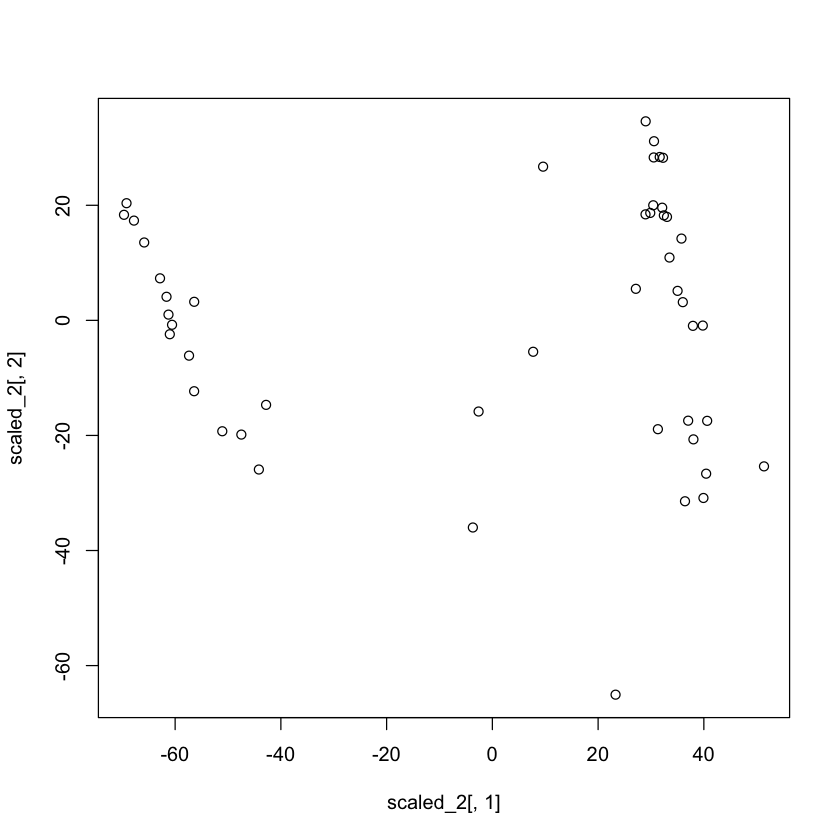

In [12]:
d <- dist(swiss)  # compute distance matrix
scaled_2 <- cmdscale(d)  # perform MDS. k defaults to 2
head(scaled_2)

# plot MDS
plot(scaled_2[,1],scaled_2[,2])

# ISOMAP

initial  value 5.463800 
iter   5 value 4.499103
iter   5 value 4.495335
iter   5 value 4.492669
final  value 4.492669 
converged


Courtelary,38.850496,-16.154674
Delemont,-42.676573,-13.720989
Franches-Mnt,-53.587659,-21.335763
Moutier,6.735536,-4.604116
Neuveville,35.622307,4.633972
Porrentruy,-44.739479,-25.495702


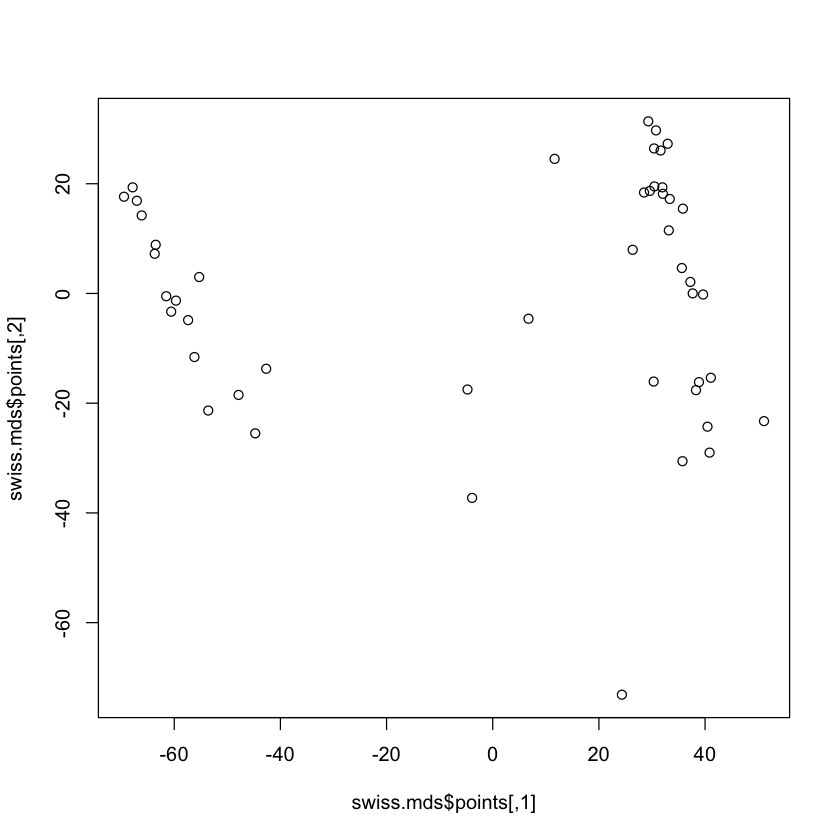

In [13]:
library(MASS)
swiss.dist <- dist(swiss)
swiss.mds <- isoMDS(swiss.dist)
head(swiss.mds$points)

# plot ISOMAP
plot(swiss.mds$points)

# Sammon 

Initial stress        : 0.01959
stress after   0 iters: 0.01959


Courtelary,37.032433,-17.434879
Delemont,-42.797334,-14.687668
Franches-Mnt,-51.081639,-19.274036
Moutier,7.716707,-5.458722
Neuveville,35.032658,5.126097
Porrentruy,-44.161953,-25.922412


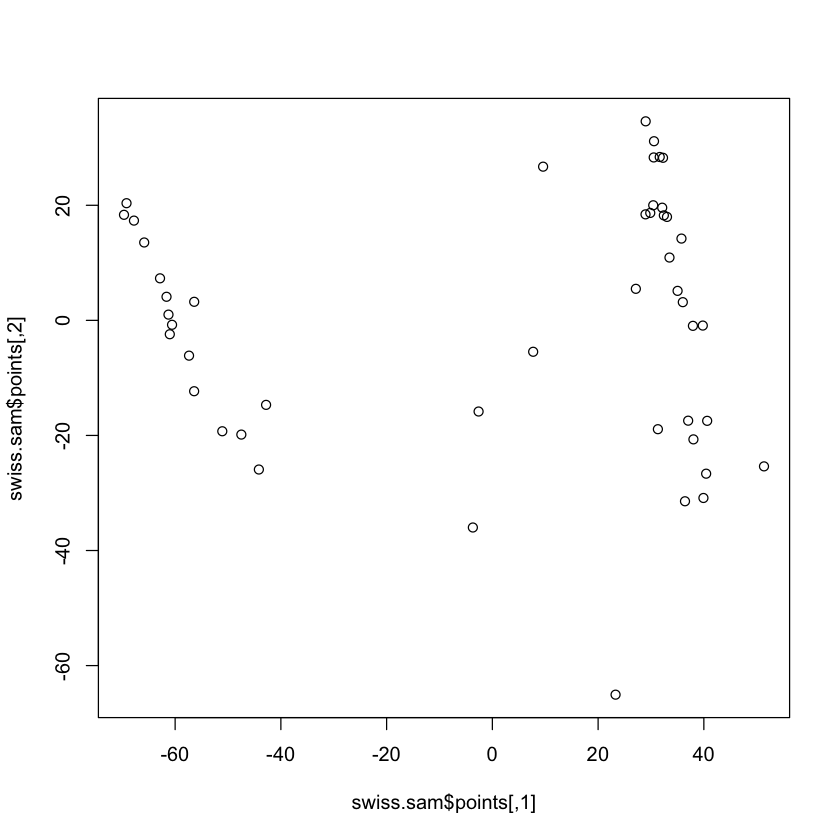

In [14]:
library(MASS)
swiss.dist <- dist(swiss)
swiss.sam <- sammon(swiss.dist)
head(swiss.sam$points)

# plot Sammon
plot(swiss.sam$points)

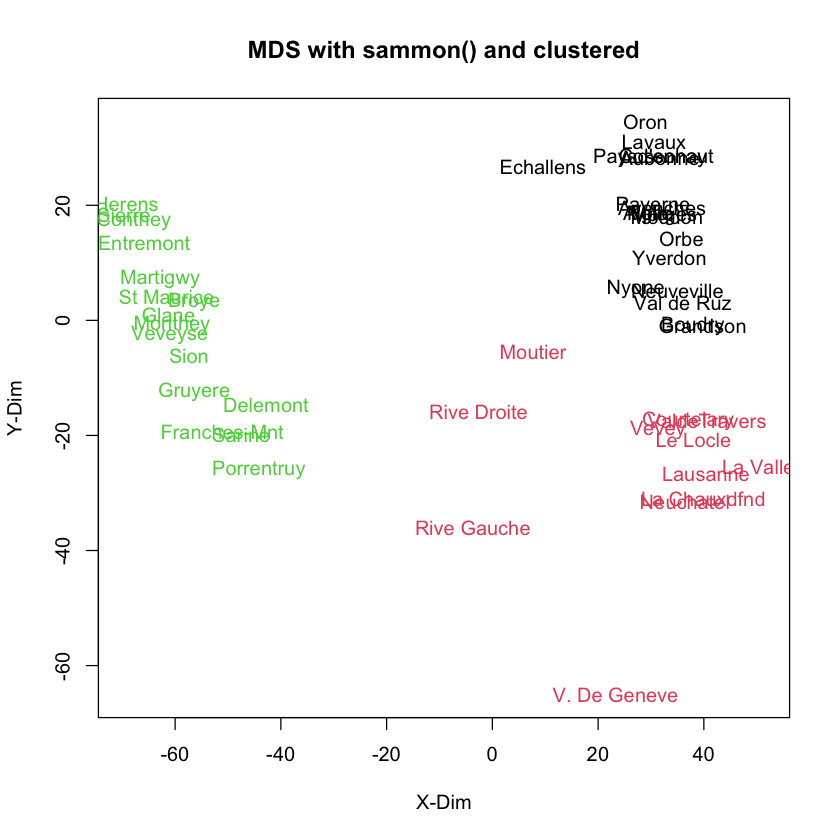

In [15]:
kmeans_clust <- kmeans(swiss.sam$points, 3)  # k-means wihth 3 clusters.
plot(swiss.sam$points, type = "n", main="MDS with sammon() and clustered", xlab = "X-Dim", ylab="Y-Dim")
text(swiss.sam$points, labels = rownames(swiss), col = kmeans_clust$cluster)  # set color using k-means output

# PCA
- Source http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/

In [27]:
# Load Iris data
head(iris, 3)
# The variable Species (index = 5) is removed before PCA analysis
iris.pca <- PCA(iris[,-5], graph = FALSE)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


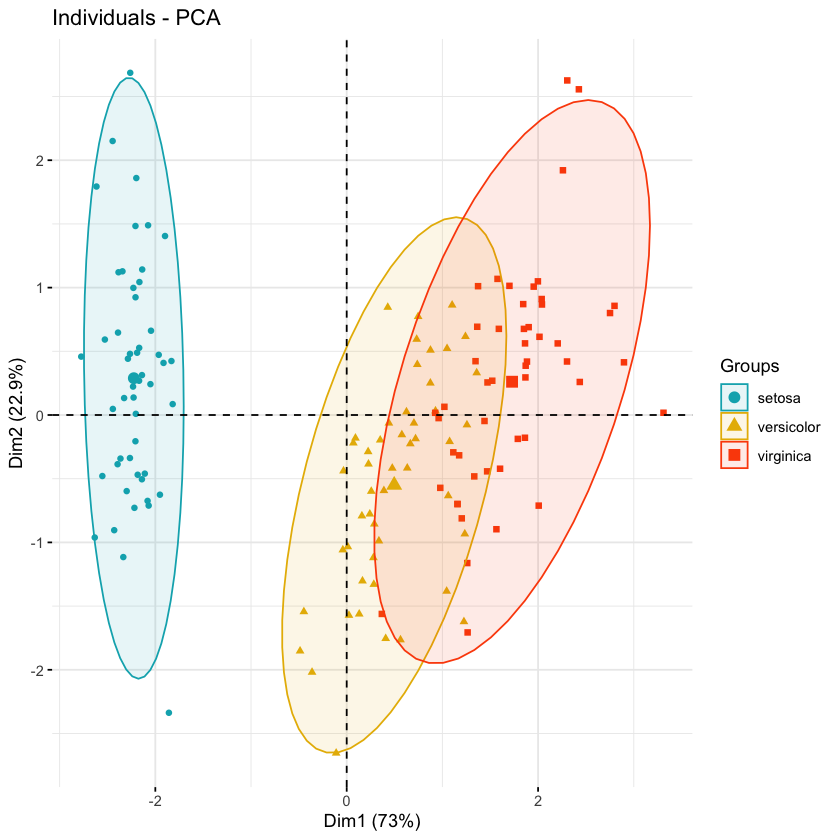

In [28]:
# PCA
fviz_pca_ind(iris.pca,
             geom.ind = "point", # show points only (nbut not "text")
             col.ind = iris$Species, # color by groups
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             addEllipses = TRUE, # Concentration ellipses
             legend.title = "Groups"
             )